In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(1080, 1920, 3)


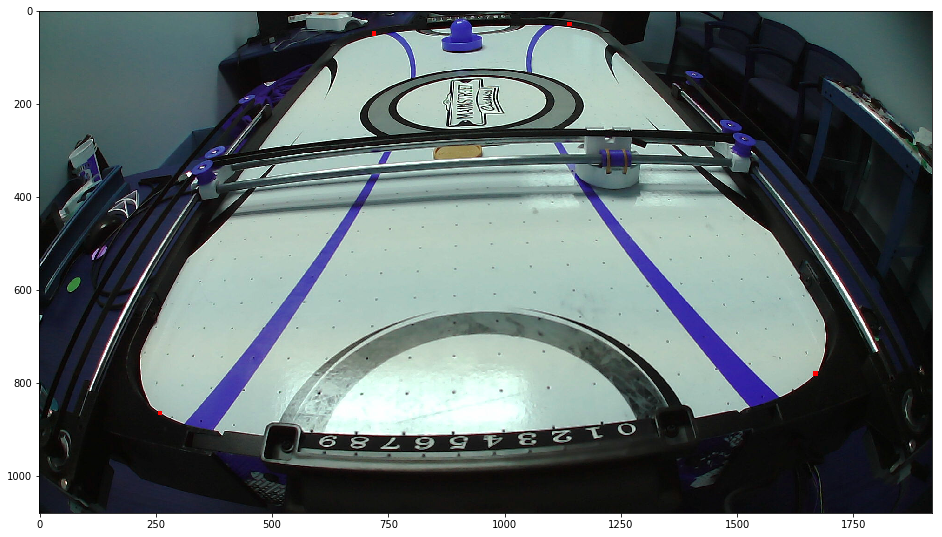

In [24]:
#Read in the starting image
raw_img = cv2.imread("Center_1.jpg")

#plt.figure(figsize=(16,16))
#plt.imshow(raw_img)

#Display the 3 corners
disp_img = raw_img.copy()
def mark_point(img, xy, radius = 5):
    img[xy[1]-radius:xy[1]+radius, xy[0]-radius:xy[0]+radius] = (255, 0, 0)
    
topLeft = (720, 50)
topRight = (1140, 30)
botRight = (1670, 780)
botLeft = (260, 865)
    
mark_point(disp_img, topLeft)
mark_point(disp_img, topRight)
mark_point(disp_img, botLeft)
mark_point(disp_img, botRight)

#mark_point(disp_img, 10, 400)
#mark_point(disp_img, 620, 370)
#mark_point(disp_img, 220, 108)
#mark_point(disp_img, 390, 100)

plt.figure(figsize=(16,16))
plt.imshow(disp_img)
print(disp_img.shape)

0.00222301483154


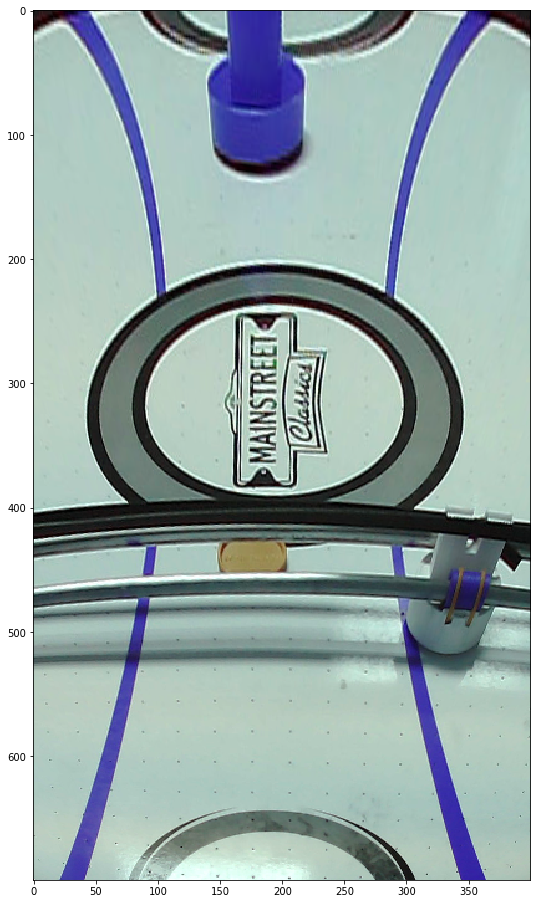

In [28]:
import time
start = time.time()
# x, y

# [topLeft[0], topLeft[1]],
# [topRight[0], topRight[1]],
# [botRight[0], botRight[1]],
# [botLeft[0], botLeft[1]]

pts_src = np.array(
    [
        [botLeft[0], botLeft[1]],
        [botRight[0], botRight[1]],
        [topRight[0], topRight[1]],
        [topLeft[0], topLeft[1]]
    ]
)
pts_dst = np.array(
    [
        [0, 699],
        [399, 699],
        [399, 0],
        [0, 0]        
    ]
)
h, status = cv2.findHomography(pts_src, pts_dst)

warped = cv2.warpPerspective(raw_img, h, (400, 700))
print(time.time() - start)

plt.figure(figsize=(16,16))
plt.imshow(warped)

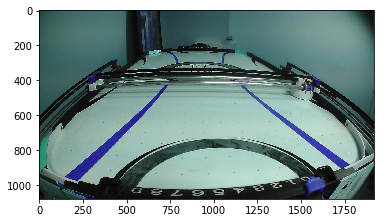

In [139]:
#Read in the starting image
raw_img = cv2.imread("Low.jpg")
plt.imshow(raw_img)

(1080, 1920, 3)


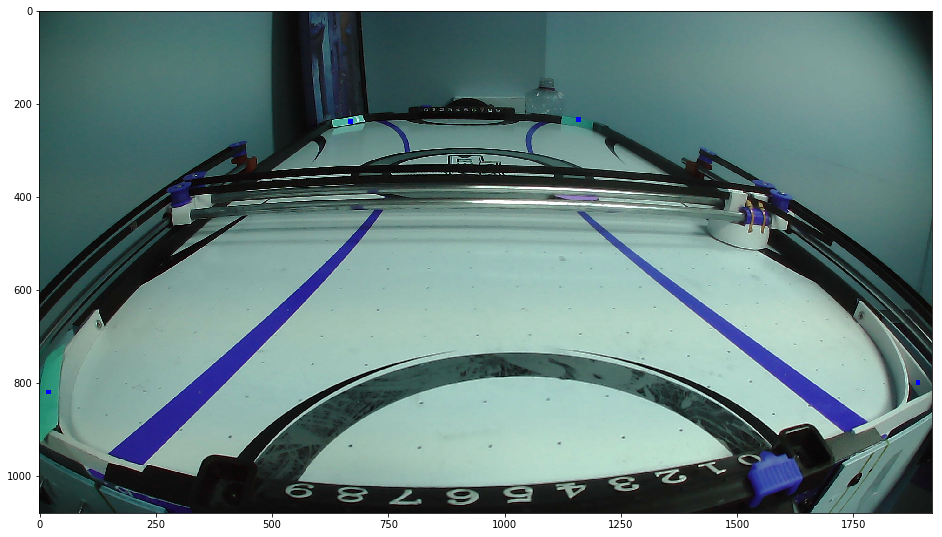

In [170]:
#Display the 3 corners
disp_img = raw_img.copy()
def mark_point(img, x, y, radius = 5):
    img[y-radius:y+radius, x-radius:x+radius] = (0, 0, 255)
mark_point(disp_img, 670, 240)
mark_point(disp_img, 1160, 235)
mark_point(disp_img, 1890, 800)
mark_point(disp_img, 20, 820)

plt.figure(figsize=(16,16))
plt.imshow(disp_img)
print(disp_img.shape)

0.0037829875946


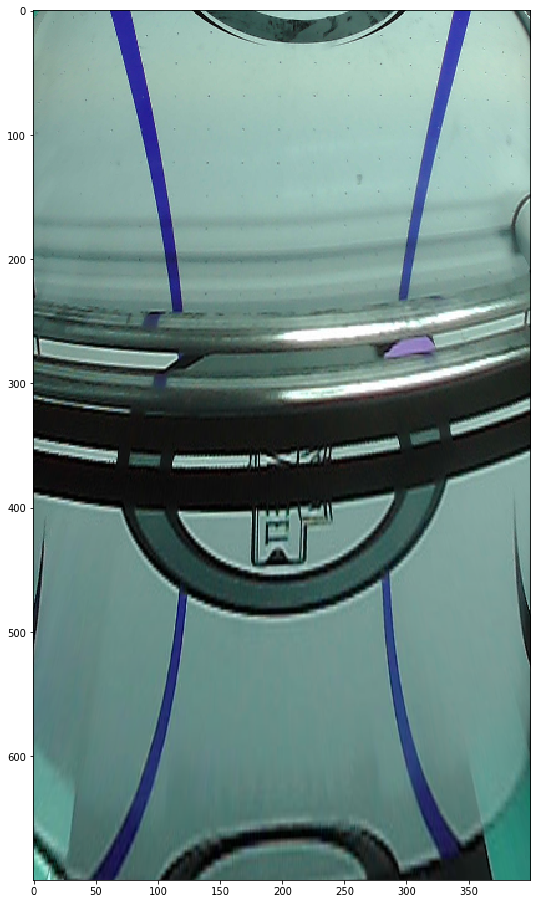

In [171]:
import time
start = time.time()
# x, y
pts_src = np.array(
    [
        [670, 240],
        [1160, 235],
        [1890, 800],
        [20, 820]
    ]
)
pts_dst = np.array(
    [
        [0, 699],
        [399, 699],
        [399, 0],
        [0, 0]         
    ]
)
h, status = cv2.findHomography(pts_src, pts_dst)

warped = cv2.warpPerspective(raw_img, h, (400, 700))
plt.figure(figsize=(16, 16))
print(time.time() - start)
plt.imshow(warped)

In [165]:
cv2.imwrite("Mapped.jpg", warped)

True